In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tiger.io import read_image, write_image
import torch
from torch.utils.data import DataLoader
sys.path.append('..')
from load_data import load_masks, DatasetMask, split_train_val_test
from unet import UNet
from config import *

In [14]:
masks, scores = load_masks(verse2019_dir, cases=5)

Loading masks from /mnt/netcache/bodyct/experiments/vertebra_fracture_detection_t9560/datasets/verse2019/masks_bodies...


In [15]:
# make train/val split
dataset = DatasetMask(scores.to_numpy(), masks, patch_size, context=2, transforms=False)

In [16]:
# initialize data loaders
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)
print(len(data_loader))

17


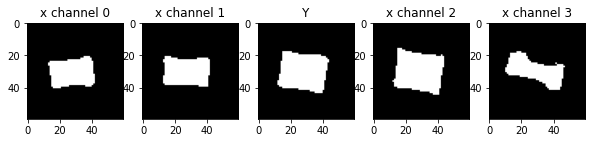

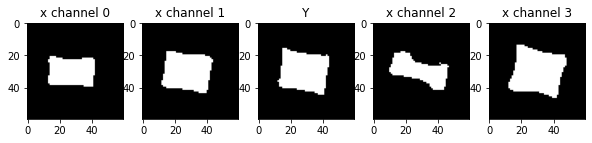

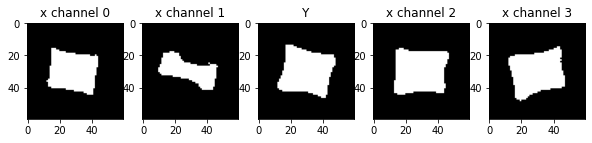

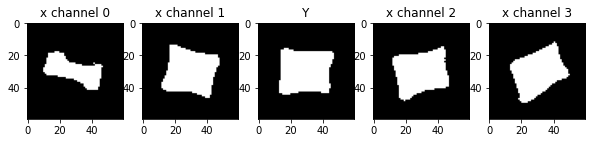

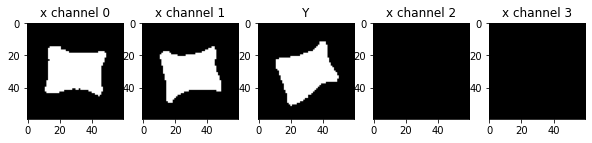

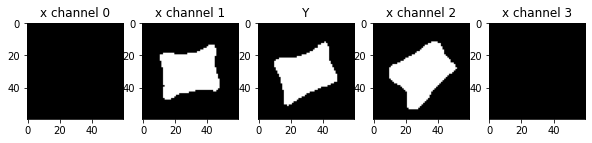

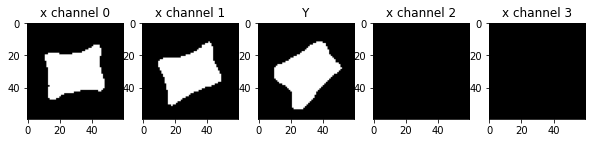

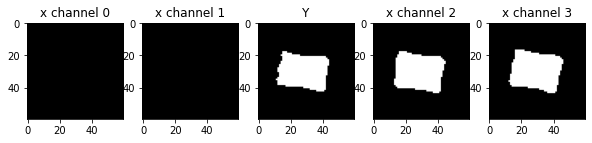

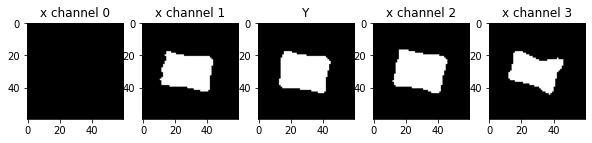

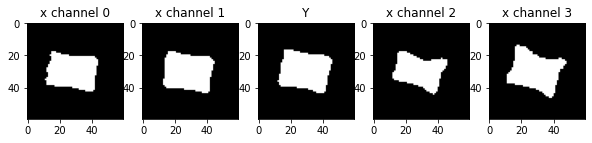

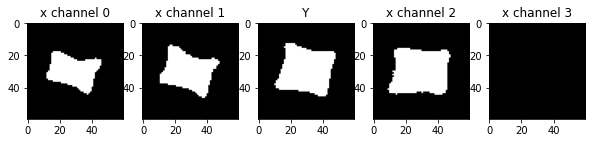

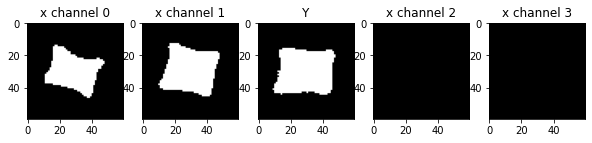

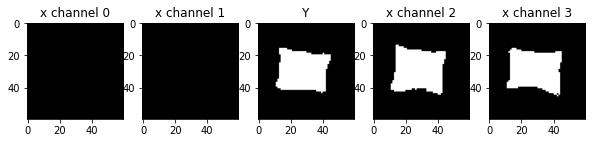

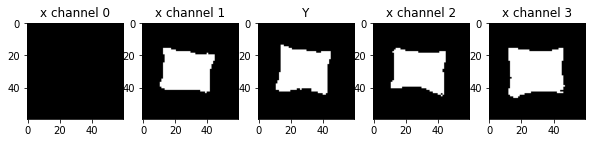

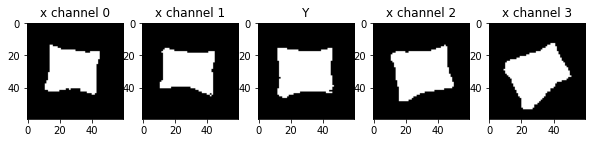

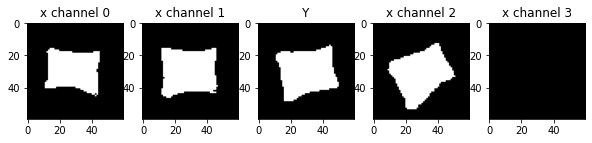

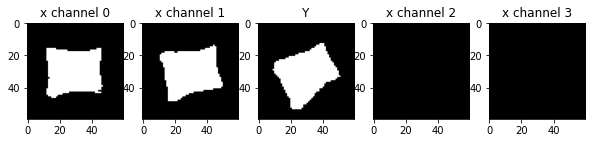

In [17]:
for x, y in data_loader:
    mid_slice = x.shape[-1] // 2 
    
    plt.figure(figsize=(10, 8))
    plt.subplot(151)
    plt.gca().set_title('x channel 0')
    plt.imshow(x[0, 0, mid_slice, :, :], cmap='gray')
    plt.subplot(152)
    plt.gca().set_title('x channel 1')
    plt.imshow(x[0, 1, mid_slice, :, :], cmap='gray')
    plt.subplot(153)        
    plt.imshow(y[0, 0, mid_slice, :, :], cmap='gray')
    plt.title('Y')
    plt.subplot(154)  
    plt.gca().set_title('x channel 2')
    plt.imshow(x[0, 2, mid_slice, :, :], cmap='gray')
    plt.subplot(155)
    plt.gca().set_title('x channel 3')
    plt.imshow(x[0, 3, mid_slice, :, :], cmap='gray')